In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2zdnicXZkW0UK4W2JufF")
project = rf.workspace("smoke-cgloa").project("camo_people")
version = project.version(2)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to camo_people-2 in yolov8:: 100%|██████████| 2168/2168 [00:00<00:00, 3106.03it/s]


In [1]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
!yolo task=detect mode=train model=yolov8s.pt data="/content/camo_people-2/data.yaml" epochs=50 plots=True

100% 21.5M/21.5M [00:00<00:00, 227MB/s]
New https://pypi.org/project/ultralytics/8.2.12 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/camo_people-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_w

In [4]:
!ls /content/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1715427887.b31742f056d4.1119.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1640.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1641.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1642.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


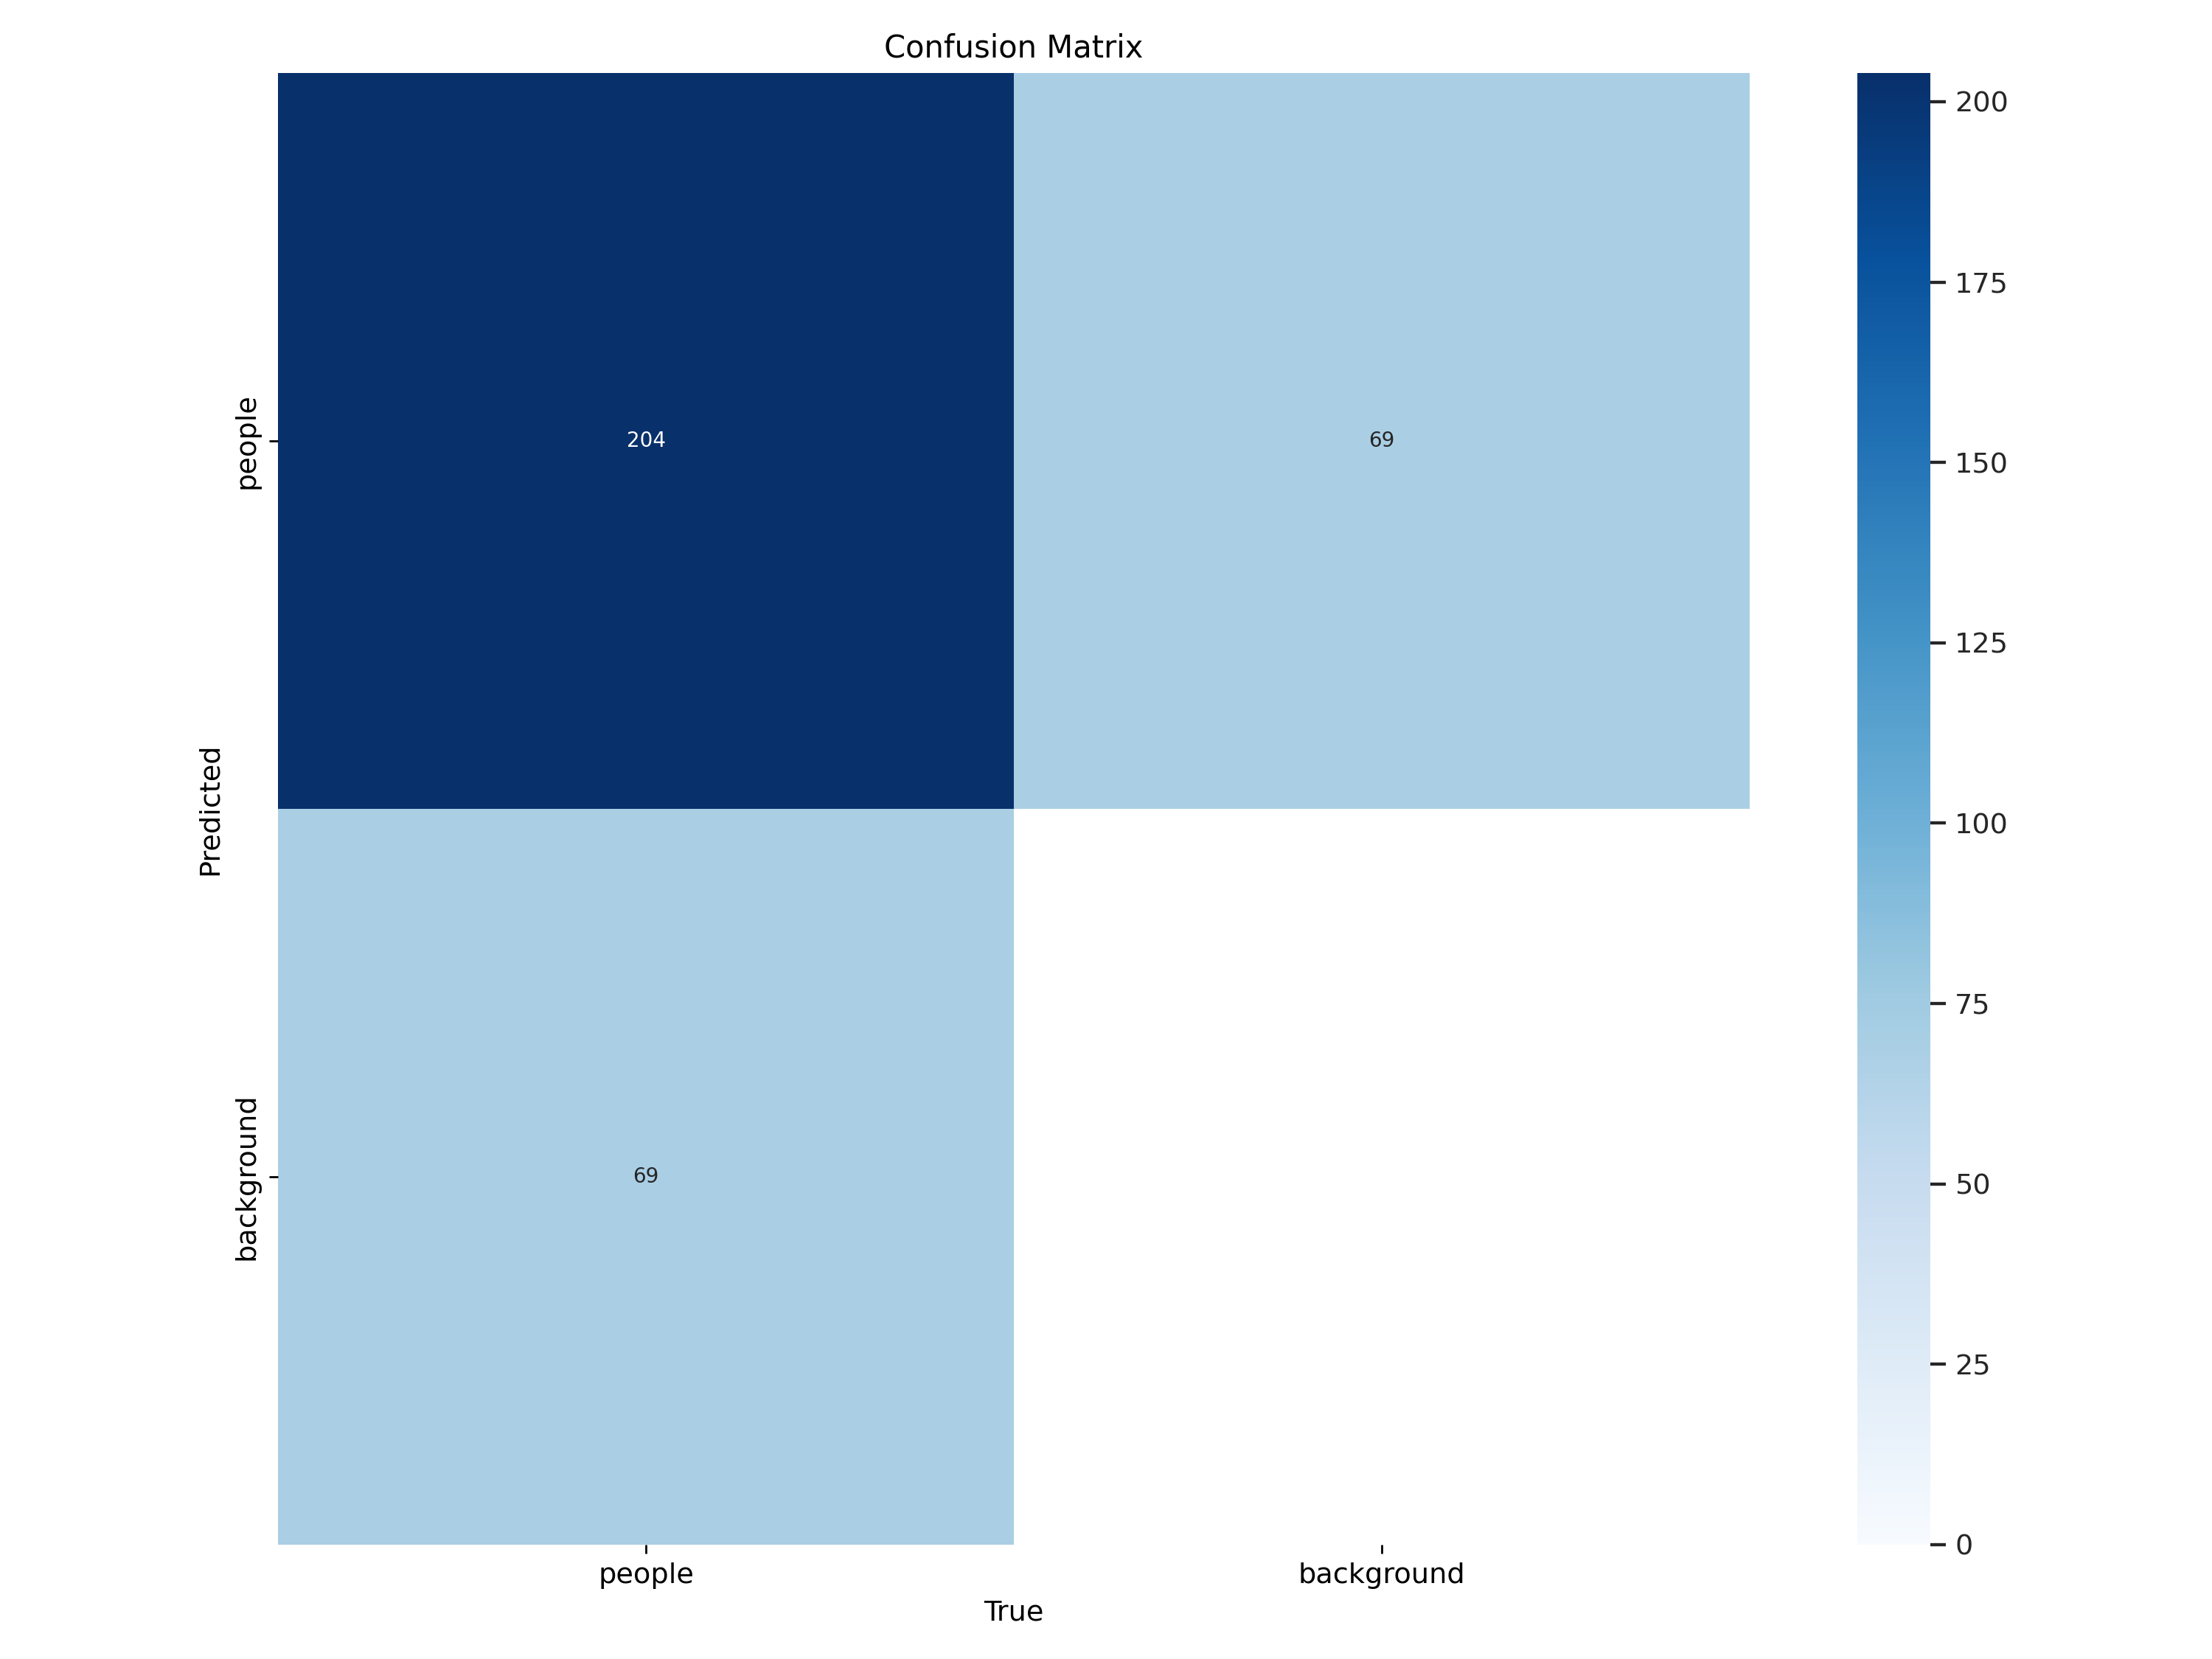

In [6]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

In [21]:
true_positives = 204  # people x people
false_positives = 69  # people x background
false_negatives = 69  # background x people
true_negatives = 0    # background x background

precision = true_positives / (true_positives + false_positives)

recall = true_positives / (true_positives + false_negatives)

f1_score = 2 * (precision * recall) / (precision + recall)

total_instances = true_positives + true_negatives + false_positives + false_negatives
accuracy = (true_positives + true_negatives) / total_instances

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.7472527472527473
Recall: 0.7472527472527473
F1 Score: 0.7472527472527473
Accuracy: 0.5964912280701754


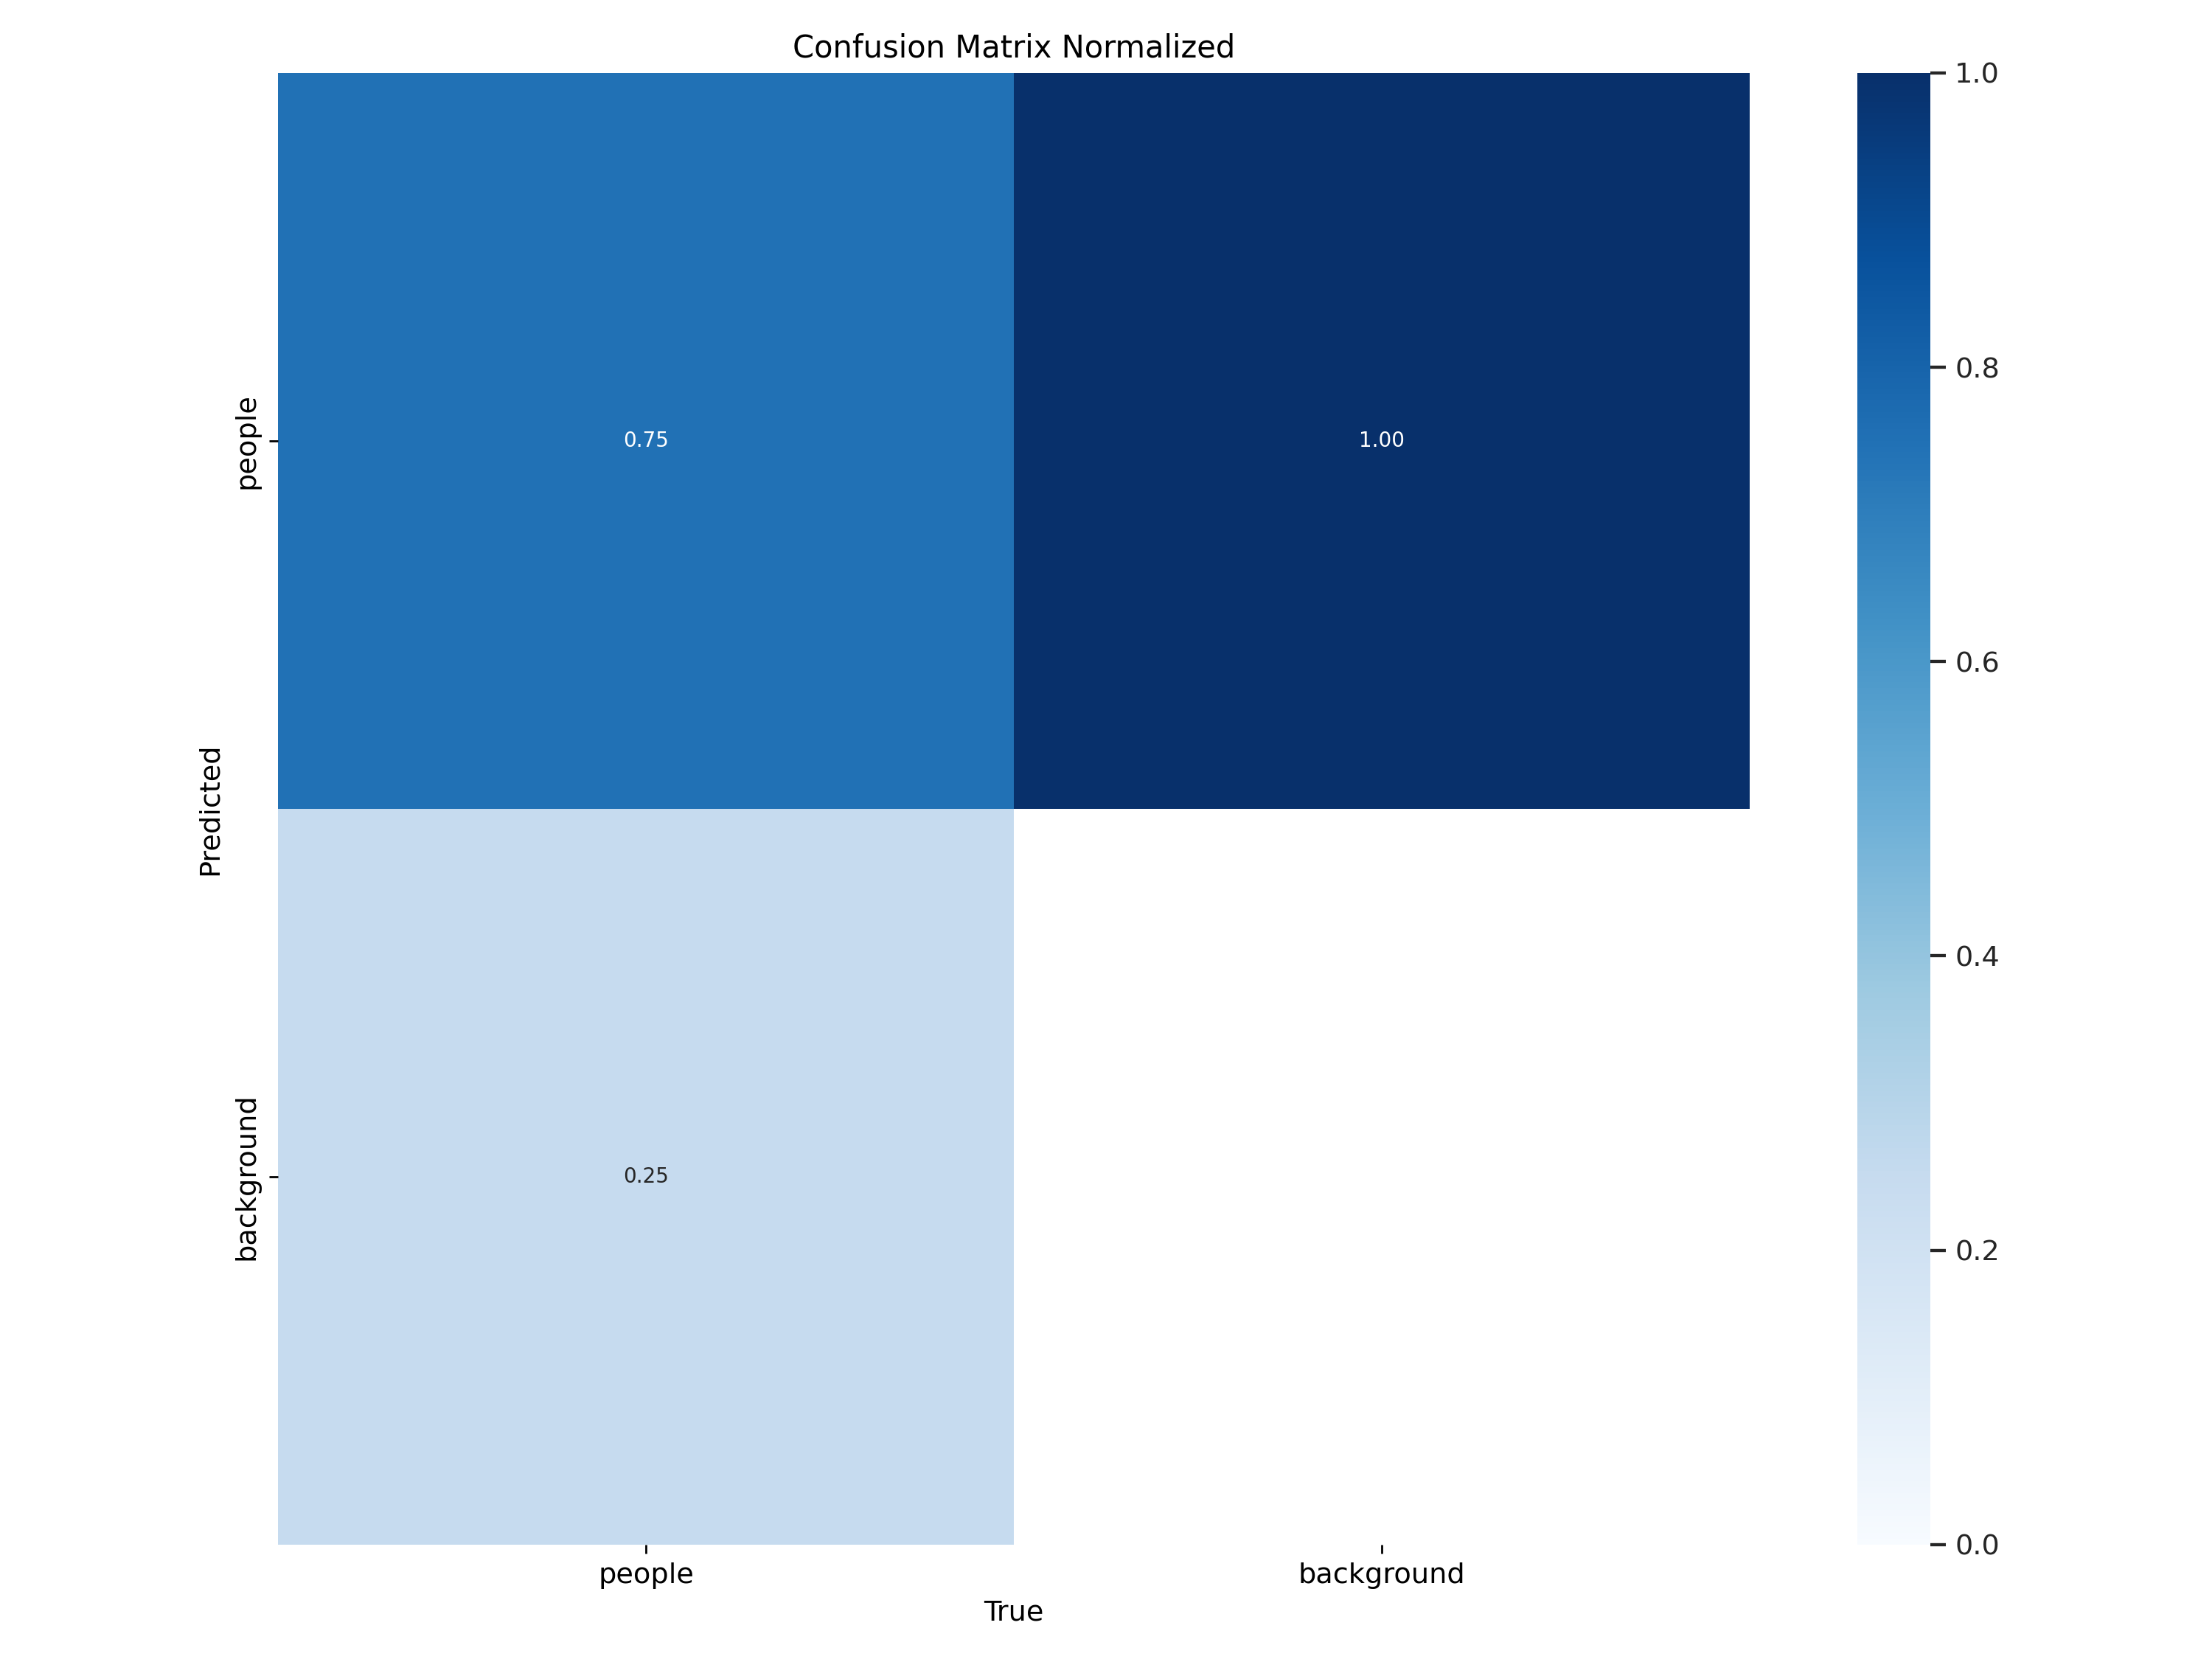

In [7]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=600)

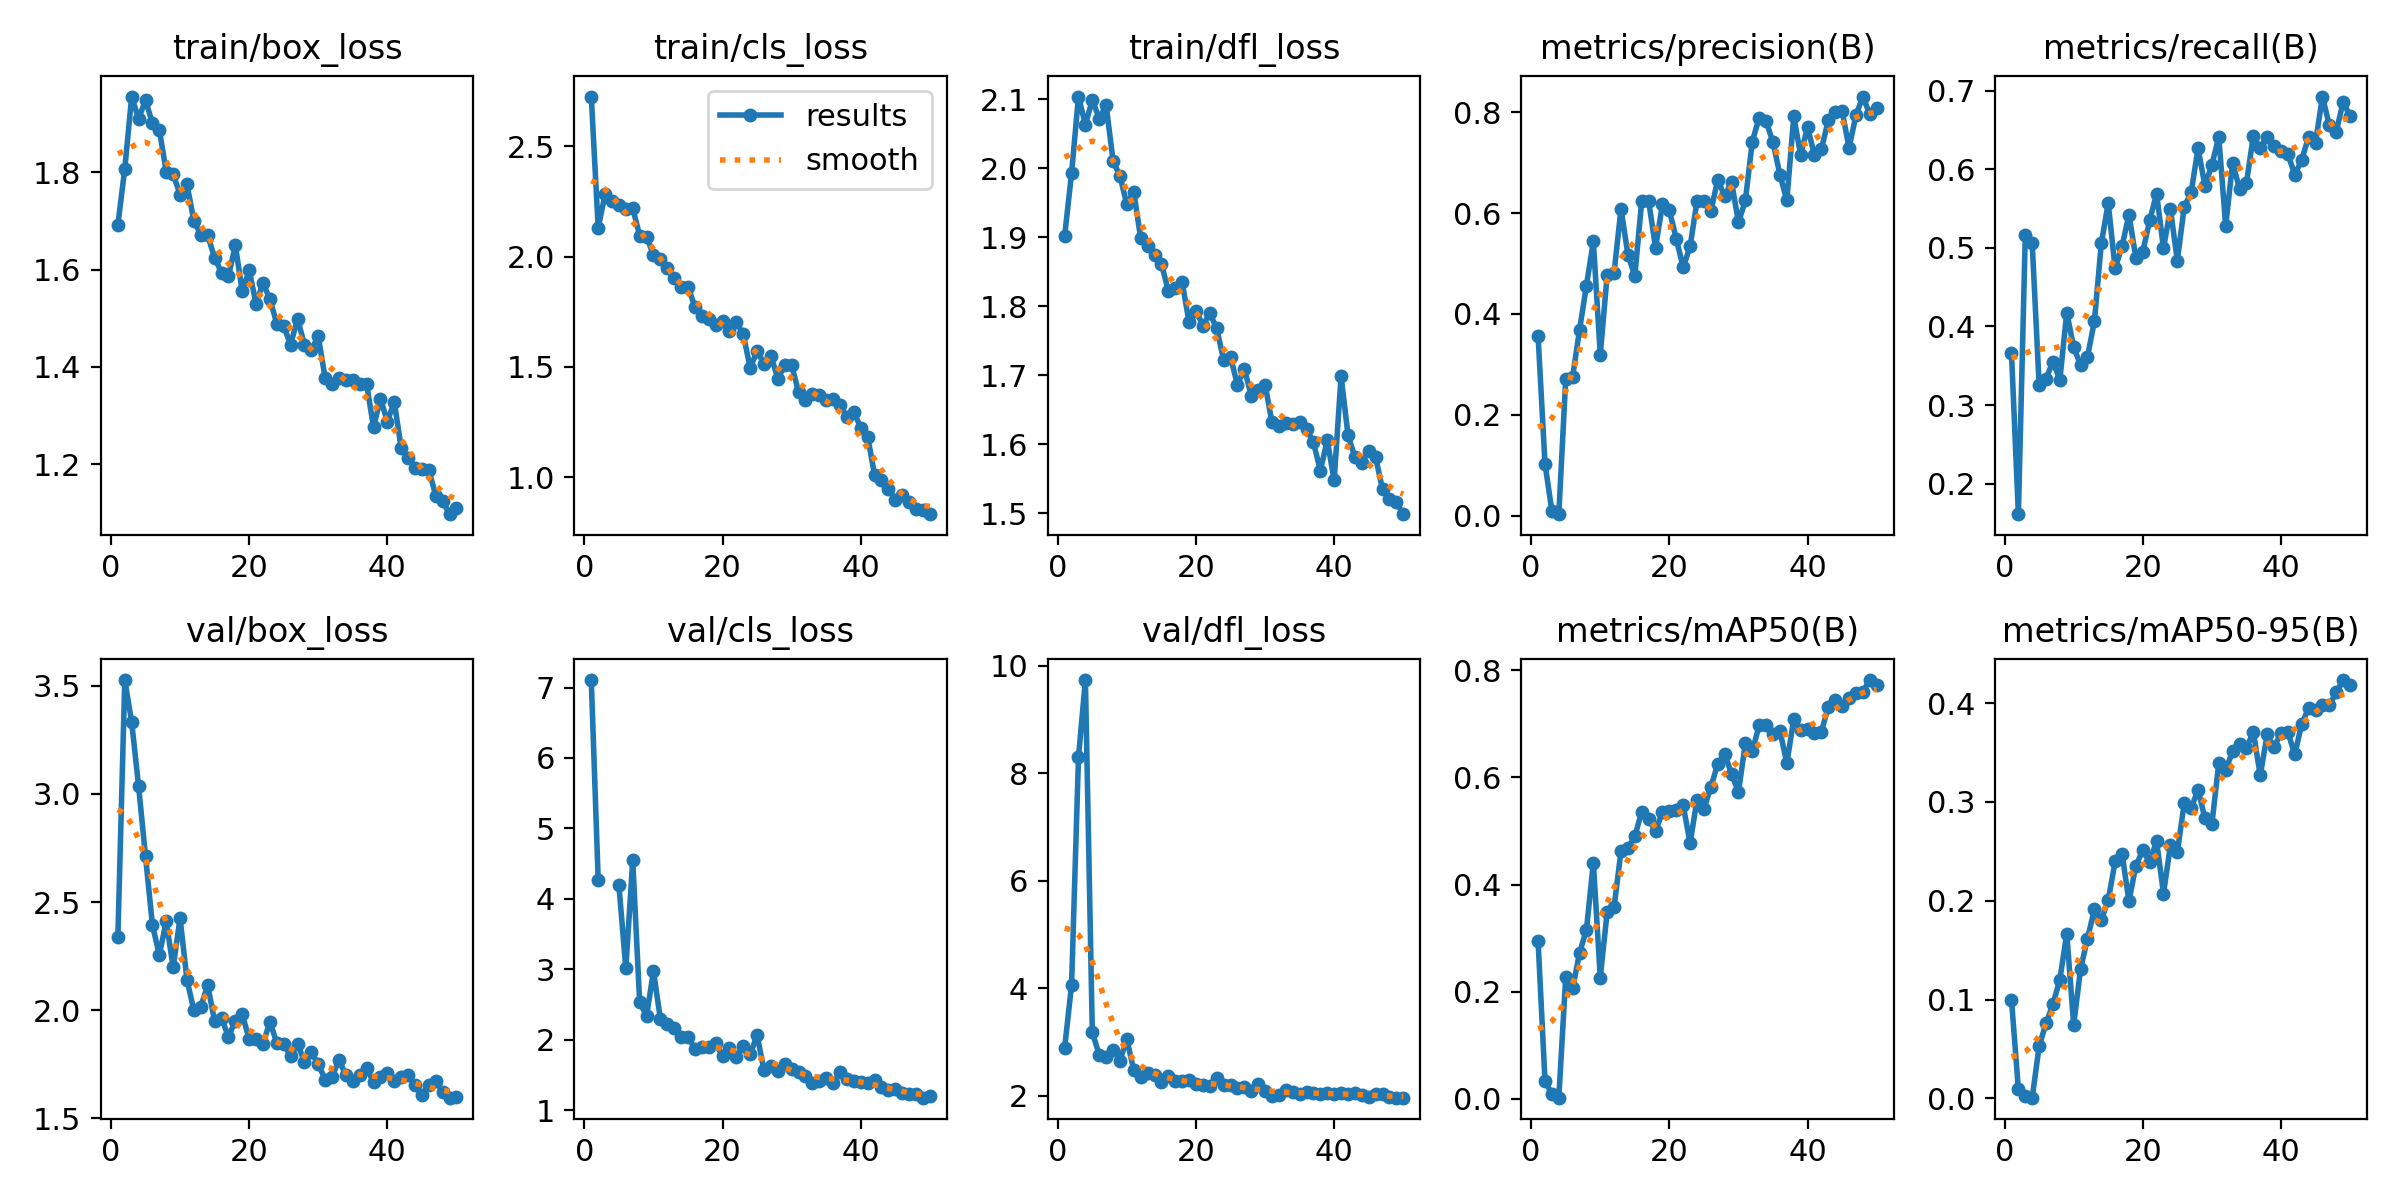

In [8]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

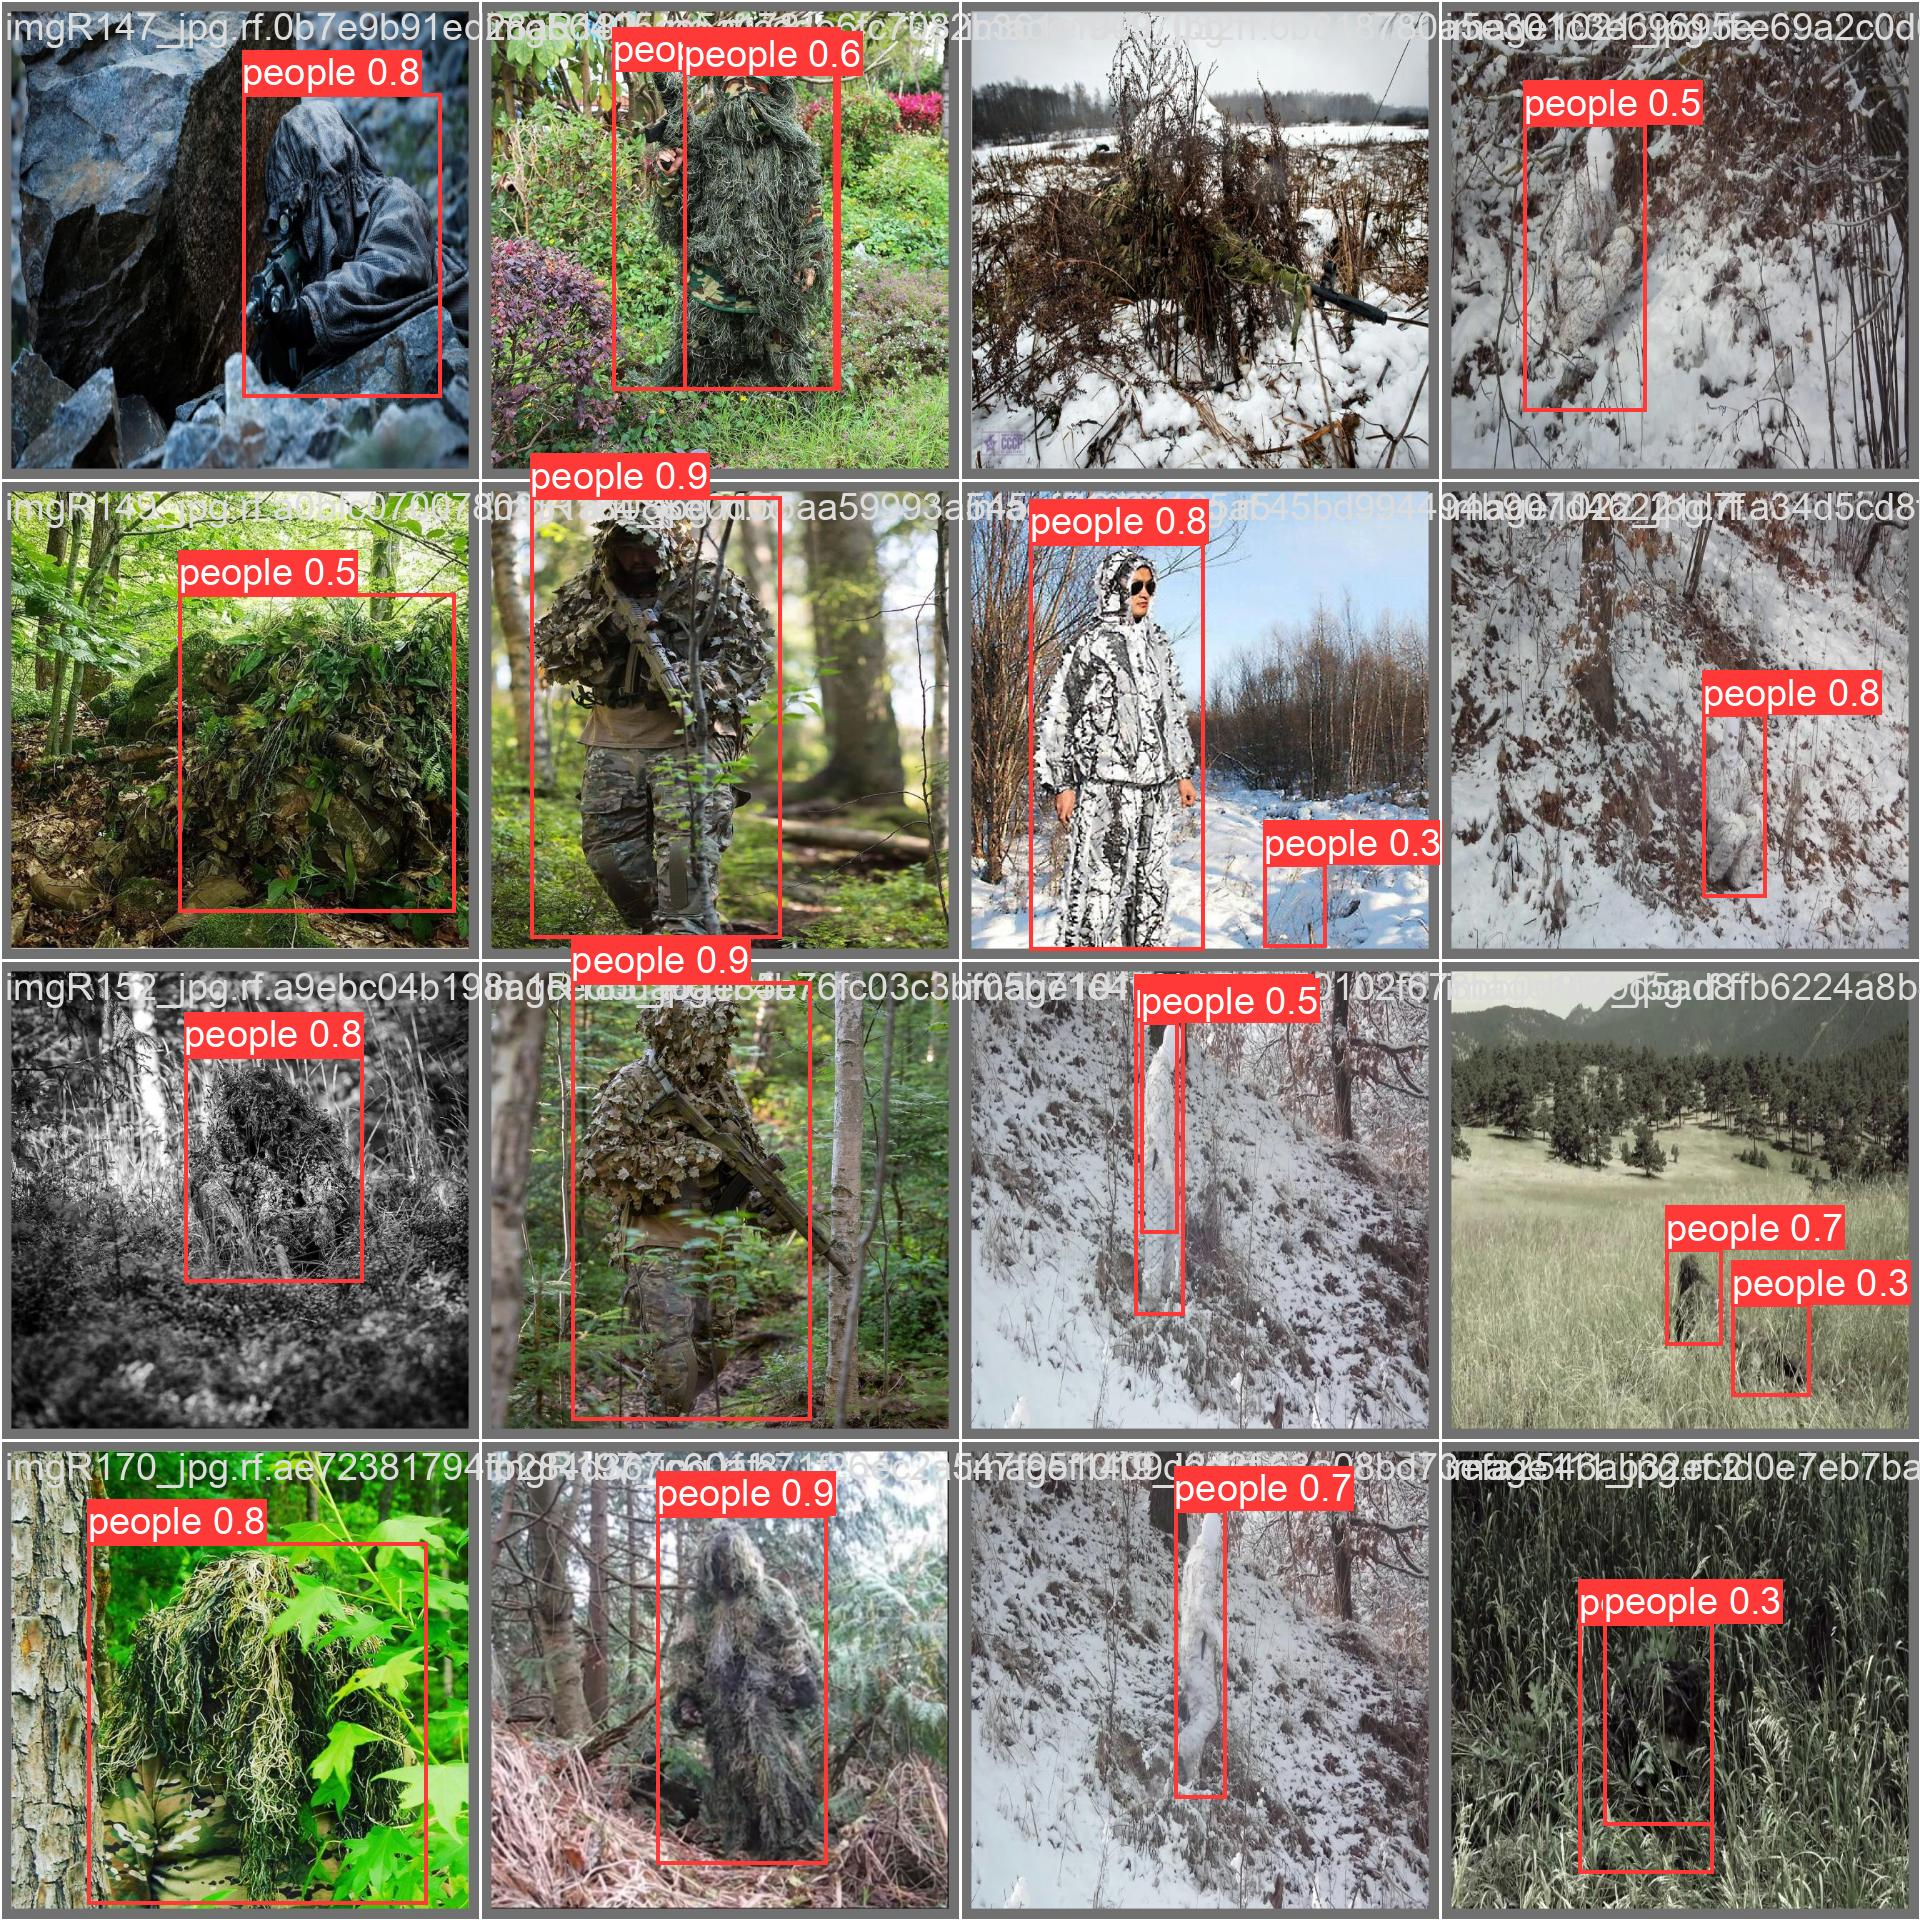

In [9]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data="/content/camo_people-2/data.yaml"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/camo_people-2/valid/labels.cache... 216 images, 0 backgrounds, 0 corrupt: 100% 216/216 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:06<00:00,  2.19it/s]
                   all        216        273        0.8      0.689      0.783      0.424
Speed: 2.2ms preprocess, 11.4ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.6 source=/content/camo_people-2/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/215 /content/camo_people-2/test/images/image1005_jpg.rf.4776101941bb50984da3fc13ba3723f1.jpg: 640x640 1 people, 16.4ms
image 2/215 /content/camo_people-2/test/images/image1006_jpg.rf.98e2a15e259e7ed066ddf577b76ddd16.jpg: 640x640 1 people, 16.4ms
image 3/215 /content/camo_people-2/test/images/image1008_jpg.rf.32761e5b622ceb6f01df980c028cfab3.jpg: 640x640 (no detections), 16.2ms
image 4/215 /content/camo_people-2/test/images/image1011_jpg.rf.7a17e51651f279e9976a325ba42a3bad.jpg: 640x640 (no detections), 16.2ms
image 5/215 /content/camo_people-2/test/images/image1013_jpg.rf.919661688b24fdd61bff64d61a1fd8a7.jpg: 640x640 1 people, 16.3ms
image 6/215 /content/camo_people-2/test/images/image101_jpg.rf.9103d83861ba73fd3e2e958e66b0a6c8.jpg: 640x640 (no detections), 16.2ms
image 7/215 /content/camo_people-2/test/images/i

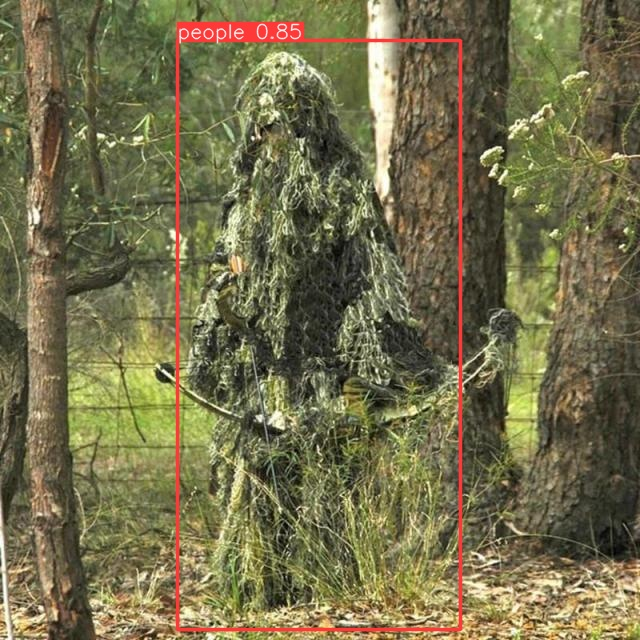

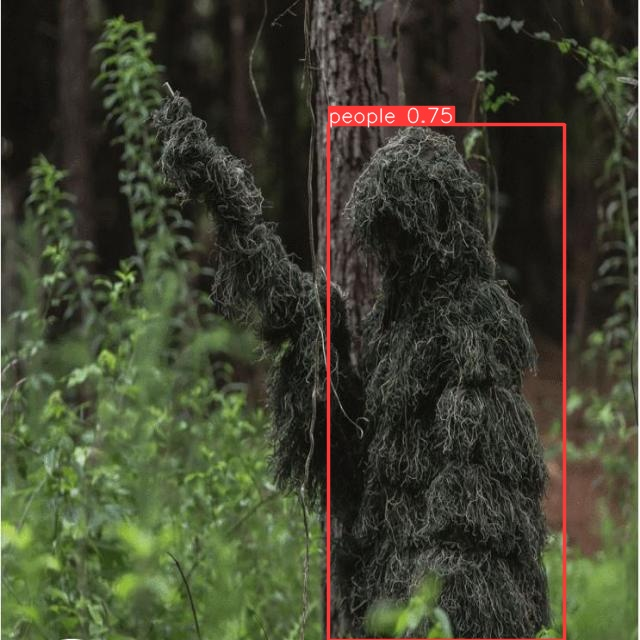

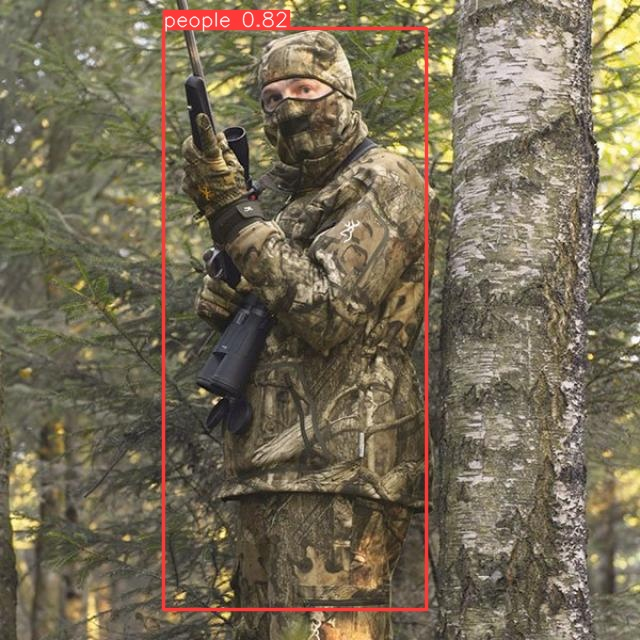

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [13]:
from PIL import Image

def resize_image(input_image_path, output_image_path):
    img = Image.open(input_image_path)
    img_resized = img.resize((640, 640), Image.ANTIALIAS)
    img_resized.save(output_image_path)

input_image_path = "/content/test_image.jpg"
output_image_path = "/content/test_image_resize.jpg"
resize_image(input_image_path, output_image_path)

input_image_path = "/content/test_image2.jpg"
output_image_path = "/content/test_image_resize2.jpg"
resize_image(input_image_path, output_image_path)

input_image_path = "/content/test_image3.jpg"
output_image_path = "/content/test_image_resize3.jpg"
resize_image(input_image_path, output_image_path)

input_image_path = "/content/test_image4.jpg"
output_image_path = "/content/test_image_resize4.jpg"
resize_image(input_image_path, output_image_path)

input_image_path = "/content/test_image5.jpg"
output_image_path = "/content/test_image_resize5.jpg"
resize_image(input_image_path, output_image_path)

input_image_path = "/content/test_image6.jpg"
output_image_path = "/content/test_image_resize6.jpg"
resize_image(input_image_path, output_image_path)

# input_image_path = "/content/video_test.jpg"
# output_image_path = "/content/video_test_resize.jpg"
# resize_image(input_image_path, output_image_path)

<ipython-input-13-fbc9aaa064b4>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((640, 640), Image.ANTIALIAS)


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt source="/content/test_image_resize.jpg"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test_image_resize.jpg: 640x640 2 peoples, 16.4ms
Speed: 3.3ms preprocess, 16.4ms inference, 526.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


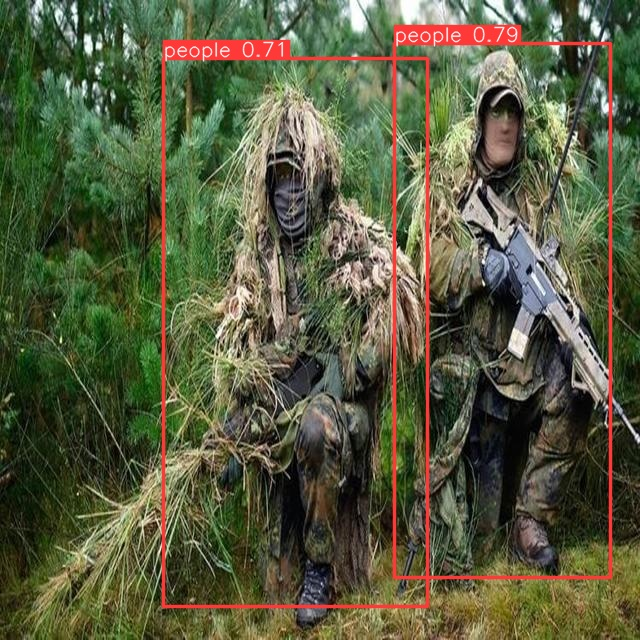

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt source="/content/test_image_resize2.jpg"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test_image_resize2.jpg: 640x640 1 people, 16.4ms
Speed: 2.9ms preprocess, 16.4ms inference, 501.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


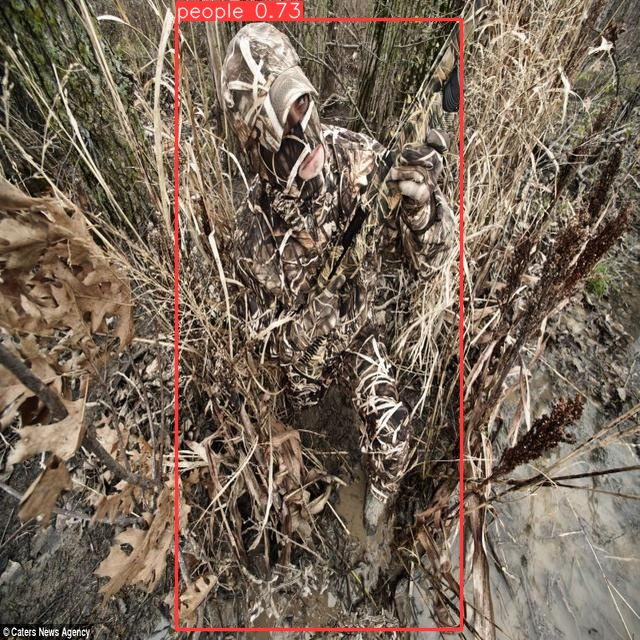

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict3/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt source="/content/test_image_resize3.jpg"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test_image_resize3.jpg: 640x640 1 people, 16.4ms
Speed: 3.0ms preprocess, 16.4ms inference, 507.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


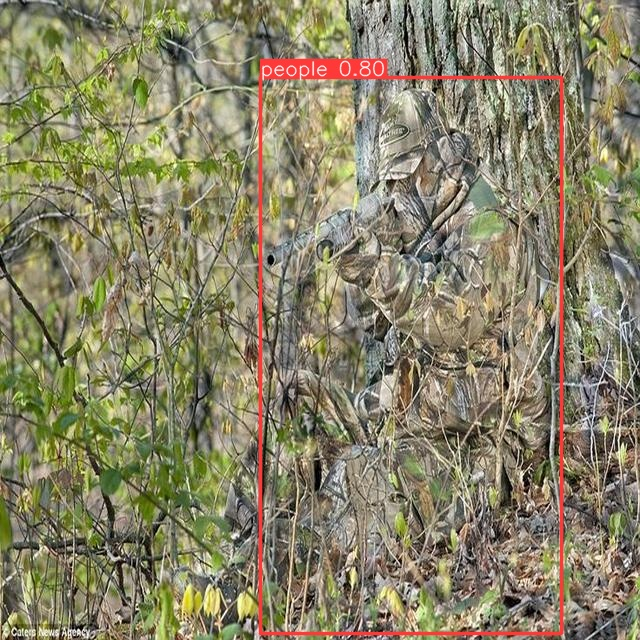

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict4/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt source="/content/test_image_resize4.jpg"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test_image_resize4.jpg: 640x640 2 peoples, 16.4ms
Speed: 2.9ms preprocess, 16.4ms inference, 497.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


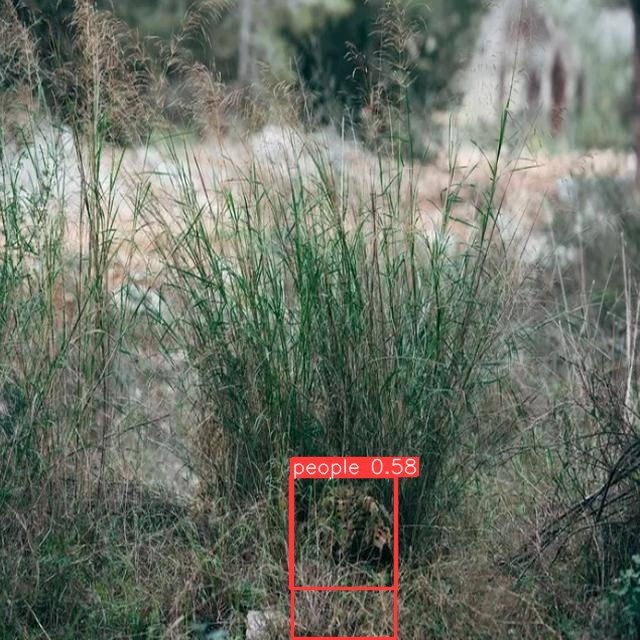

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict5/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt source="/content/test_image_resize5.jpg"

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/test_image_resize5.jpg: 640x640 1 people, 17.0ms
Speed: 2.7ms preprocess, 17.0ms inference, 652.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


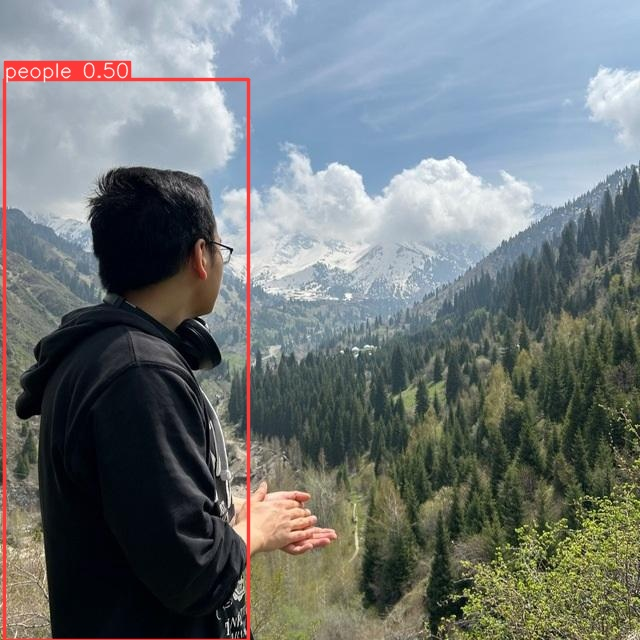

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict7/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")